# <font color=green>SUBOPTIMAL ALLOCATIONS OVER THE LIFE CYCLE</font>

# <font color=grey>Tilburg University - Applied Economic Analysis 1</font>

### <font color=grey>Nasharetty Wiesken 
##### <font color=grey> Anr.876834
### <font color=grey>Paola Rios 
##### <font color=grey>Anr.392717
***
  

## Abstract
We explore suboptimal financial planning over the life cycle of an individual with preferences. As benchmark, the model and approach of [Koijen, Nijman and Teulings' (2007)](https://www.netspar.nl/assets/uploads/PP1_inhoud_WEB.pdf "Saving and investment over the life cycle and the role of colective pension funds") is used to analyze different scenarios of asset and consumption allocation  over life cycle. The benchmark is used as reference point to measure welfare losses of suboptimal decisions. Three scenarios will be evaluated: an inconsistency in the risk aversion preference; suboptimal consumption decisions that results from oversaving; and suboptimal decisions from undersaving during the working life period.   
<a name="Back to research question"></a>

## Research question


What are the implications in terms of welfare, when suboptimal decisions are taken over the lifecycle?

## Motivation

Saving for retirement, is one of the most important financial decisions an individual have to face over time. Besides the complexity of the task people make behavior mistakes (e.g. interia). Therefore people may need some help in order to sufficiently safe for retirement.

Even though many countries now have a pension plan for all their citizens, there is a major concern related with the possibility to offer more choices in the savings plan. Considering the enormous heterogeneity and accounting for individual preferences, individuals may suffer welfare loss with the standard practice of "one size fits all". 

In this sense, we briefly explain the optimal life cycle trajectory. We then explore the implications of a suboptimal investment decision because the wrong prediction of the risk aversion parameter.  We continue by analyzing another scenario in which consumption is affected by oversavings during working life and another when undersaving. We finish with some main implications and conclusions.

(the following study approaches three feasible situations an individual face regarding the pension plans, regarding wrong estimation and analyses how the existence of heterogeneity lead to different suboptimal outcomes. We mainly analyze the major implications for wealth accumulation process, consumption and welfare (utility).)


## Method 
We explore an optimal financial planning over the life cycle of an individual with preferences. The benchmark model from the working paper version of Bovenberg, [Koijen, Nijman and Teulings (2007)](https://www.netspar.nl/assets/uploads/PP1_inhoud_WEB.pdf "Saving and investment over the life cycle and the role of colective pension funds"), is used in the simulation as the optimal reference point. The constant parameters defining the model are a 45 years working period, a 15 years expected retirement, a coefficient of risk aversion equal to 5, time preference and risk-free rate of 2% a year, equity risk premium of 4% a year and a standard deviation of 20% a year. Furthermore, we follow the equations and notation from the paper's appendix in order to generate five thousands simulations, which are use to shape the behavior of the average individual. The welfare changes are measured with the variation and deviation from the certain equivalents' values of the optimal scenario.

The first three notebook sections set the dynamics and the optimal behavior of a rational individual in an environment with imperfect markets. The fourth section evaluates the consequences of a mismatch in the risk aversion coefficient of the individual. The fifth section explore the welfare loss when the individual oversaves during the working period. The sixth section analyze the implications in the lifecycle when the individual undersaves in the active period.

The benchmark model has various assumptions. The ones worth mentioning for the scope of our exercise are as follow:

We are dealing with a small open economy where prices are given on the world market. Labour supply and wages are fixed. Risk is absent form labour market and the only aggregate risk factor is risk from the financial market. Moreover, individuals and/or pension funds can trade on the financial market for risky asset or risk free rate assets. We asume that financial markets are dynamically complete but when there is presence of an investment pension fund, it is assume that individuals have access to the financial market only through the channel of the pension funds and therefore cannot offset policies implemented by the pension fund by engaging in offsetting transaction on the financial market. Finally, individual has fixed preferences over time and a CRRA function outlines the individual’s utility. The time of death is known, individual lives until the age of 80.

## Importing libraries

In [94]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
from IPython.display import Markdown as md



plt.style.use('seaborn')
%matplotlib inline

## Definition of Variables


#### Lifecycle Parameters:

- $D$   Years of life
- $T$   Working life 
- $t$   Age beginning workig period 
- $delta T$ Time interval

#### Economic Parameters:

- $r$ real interest rate
- $\sigma$ standard deviation of the excess return on the risk factor
- $eer$ excess return
- $\lambda$ sharpe ratio

#### Individual $i$ Preference Parameters:

- $\theta$ Risk aversion parameter 
- $\rho$ Time preference parameter 

## Baseline Scenario:

In [71]:
D=60
T=45
deltat=1
age_start=20
r =0.02
sigma=0.2
eer=0.04
lambd=eer/sigma
theta= 5
rho=0.02

## 1. Specification of Human Capital

In the model individuals have human wealth, which is the discounted value of future wage incomes.

### 1.1. Defining age

In [5]:
age=[]
for i in range (age_start,age_start+D+1):
    age.append(i)
print(age)

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


### 1.2. Specification of Labour Earnings

Labour earnings ($Y$) are defined as a constant. This variable is normalized and represented by the vector Y that takes the value of 1 from the starting work age until the retirement. At the  retirement age the vector takes the value of 0.

In [6]:
Y=[]
for i in range (0,D+1):
    if age[i]<(age_start+T):
        Y.append(1)
    elif age[i]>=(age_start+T):
        Y.append(0)
print(Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 1.3. Specification of Human Capital

Since labour earnings are defined as constant with no risk and with an exogenous age of retirement, then the human capital depends on the rate of return and the working career time span. The functional form of human capital is defined as:

$$H_t = \cfrac{1}{r}\  (1-e^{-r(T-t)})$$

[29.671517012970046, 29.260854415920935, 28.841895884112557, 28.414473828546015, 27.97841727470004, 27.533551794138923, 27.079699434738824, 26.61667864950454, 26.14430422394828, 25.662387202001412, 25.17073481042953, 24.669150381720524, 24.15743327541504, 23.635378797847572, 23.102778120266276, 22.55941819529868, 22.005081671729897, 21.439546807559257, 20.862587381300518, 20.273972601490282, 19.673467014368327, 19.060830409692958, 18.435817724653702, 17.79817894584293, 17.147659009247164, 16.483997698218033, 15.806929539382208, 15.116183696448449, 14.411483861869517, 13.692548146315453, 12.959088965914106, 12.210812927213727, 11.447420709821687, 10.668606946672327, 9.874060101876076, 9.06346234610091, 8.2364894294364, 7.392810551689433, 6.532088230059707, 5.653978164142126, 4.758129098202025, 3.8441826806682124, 2.911773320787564, 1.9605280423838412, 0.9900663346622374, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


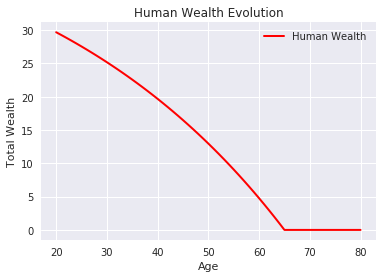

In [7]:
human_capital=[]
for i in range (0,D+1):
    human_capital.append((1/r)*(1-np.exp(-r*max(0,(age_start+T-age[i])))))
print(human_capital)
plt.plot(age, human_capital, color = 'r', linewidth = 2, label = 'Human Wealth')
plt.xlabel('Age')
plt.ylabel('Total Wealth')
plt.title('Human Wealth Evolution')
plt.legend()
plt.show()

### 1.4. Optimal consumption and investment decisions

The individual chooses the optimal consumption and investment path maximizing the following problem:

$$\max_{x, C} \bigg(\cfrac {1}{1-\theta^i} C^{1-\theta^{1}} + J_F(F(f^{*}\sigma \lambda +r) + 1 -C) + \cfrac{1}{2} J_FF(F f^{*}\sigma)^2 + J_t\bigg)$$
The optimal consumption is defined by the following equation:


\begin{equation}
\label{eq:1}
\tag{1}
C_t =(F_t + H_t)g(D-t)^{-1}
\end{equation}

The model assumes that human capital is non tradable and acts like a risk-free asset. In contrast, financial wealth is exposed to risk and the individual chooses the share of financial wealth invested in risk-bearing assets $f_t^{*}$ such that:
<a name="equation2"></a>
\begin{equation}
\label{eq:2}
\tag{2}
f_t^{*} = \cfrac{1}{\theta^i} \cfrac{\lambda}{\sigma} \Big(1+\cfrac {H_t}{F_t}\Big) 
\end{equation}


The optimal consumption and investment decisions leads to the following condition for the growth rate of wage income $g$ :

$$g(D-t)=\cfrac{1}{A} (e^{A(D-t)}-1)$$

The variable A is defined as:

$$A= \cfrac{(1-\theta^i)r-p^i}{\theta^i} + \cfrac{1}{2} \cfrac {1-\theta^i}{(\theta^i)} \lambda^2$$ 


In [8]:
A=((1-theta)*r-rho)/theta+0.5*((1-theta)/theta**2)*lambd**2
print(A)
g=[]
for i in range (D+1):
    g.append((1/A)*(np.exp(A*(D-(age[i]-age_start)))-1))
print(g)

-0.0232
[32.38889431719484, 32.13741073558279, 31.88002452917978, 31.6165971562202, 31.346986823195074, 31.071048408529748, 30.788633384470128, 30.499589737135516, 30.203761884694995, 29.900990593623302, 29.591112892991152, 29.273961986743785, 28.949367163920673, 28.617153706767922, 28.277142796693962, 27.92915141801791, 27.57299225945879, 27.208473613312613, 26.83539927226296, 26.453568423769624, 26.062775541978457, 25.662810277094113, 25.253457342156356, 24.83449639715876, 24.40570193044761, 23.96684313733707, 23.517683795875264, 23.05798213969453, 22.58749072787718, 22.10595631176698, 21.613119698654458, 21.10871561226277, 20.592472549958984, 20.064112636613952, 19.5233514750321, 18.969897992870603, 18.403454285965587, 17.823715457981002, 17.23036945629385, 16.623096904027445, 16.00157092814231, 15.365456983492122, 14.71441267275006, 14.048087562108615, 13.366122992653615, 12.66815188731102, 11.953798553262455, 11.22267847972328, 10.4743981309742, 9.70855473453511, 8.924736064367083

## 2. Monte Carlo Simulation

#### 2.1. Generating random normal distribution
The model use five thousands simulations. The investor has two types of assets: stocks $P_t$ and bonds $B_t$. These variables are determined by the following dynamics:
$$\cfrac{dP_t}{P_t}=\overline{\mu_t}dt + \sigma d Z_t$$
$$\cfrac{dB_t}{B_t}=rdt$$


We create the matrix $Z$  that represents the stocks' random component:

In [9]:
scenarios=5000
Z=[]
Z=np.random.normal(0, 1, size=(scenarios, D+1))
print(Z)

[[-0.83158079  0.45667933 -0.04031188 ...  0.19283526 -1.35721132
   0.02896918]
 [ 0.9380881   2.89277093 -0.05959764 ...  2.80604489  0.46473607
   0.94585785]
 [-0.70793515  1.39735077 -0.8861213  ...  0.20567521 -1.55286582
   1.12121369]
 ...
 [ 1.12564593  1.7383777  -1.11482578 ...  0.72102181 -0.50353078
   0.16654754]
 [ 0.86791473  1.71105003 -0.16347054 ... -0.01320755 -0.56248287
  -1.12244682]
 [-0.56739291 -0.0306538  -0.13247107 ...  1.25705267  1.54385988
  -0.43885791]]


#### 2.2. Defining Financial Wealth and Consumption for every simulation in 2.1.

Financial wealth obeys the following dynamics:
<a name="equation3"></a>
\begin{equation}
\label{eq:3}
\tag{3}
dF_t= F_t (r+f_t^{*}\sigma\lambda)dt + F_t f_t^{*}\sigma dZ_t + (Y_t -C_t)dt
\end{equation}

Total wealth is by definition:
$$W_t=F_t+H_t$$
We replicate the dynamics of the optimal investment and consumption decisions in two steps. First, we create the matrixes that will store the results per year of every individual. Second, we use the equations (1), (2) and (3).

In [10]:
C = np.zeros((scenarios, D+1)) 
F = np.zeros((scenarios, D+1)) 
fstar = np.zeros((scenarios, D+1)) 
fstar_times_F = np.zeros((scenarios, D+1))

In [11]:
for i in range(D+1):
  for j in range (scenarios):
    
    if i==0:
      F[j][i] = 0
    else:
      F[j][i] = F[j][i-1]+F[j][i-1]*r*deltat + fstar_times_F[j][i-1]*sigma*lambd*deltat+ fstar_times_F[j][i-1]*np.sqrt(deltat)*sigma*Z[j][i]+(Y[i-1]-C[j][i-1])*deltat
    
    C[j][i] = (F[j][i] + human_capital[i])*g[i]**(-1)
    fstar_times_F[j][i] = (1/theta)*(lambd/sigma)*(F[j][i]+human_capital[i])
      
    if i==0:   
      fstar[j][i] = 'NAN'
    else:
      fstar[j][i] = fstar_times_F[j][i]/F[j][i]
print(F)
print(fstar.T)

[[ 0.00000000e+00  8.63285302e-01  1.13561541e+00 ...  2.55954140e+00
   1.18256404e+00  2.07113253e-02]
 [ 0.00000000e+00  3.75458664e+00  3.98777508e+00 ...  2.56923925e+00
   1.37428541e+00  7.44717855e-02]
 [ 0.00000000e+00  1.97973125e+00  1.18983858e+00 ...  2.83736662e+00
   1.28871961e+00  7.88744019e-02]
 ...
 [ 0.00000000e+00  2.38448270e+00  1.28948509e+00 ...  1.74135558e+00
   8.64006768e-01  1.98868857e-02]
 [ 0.00000000e+00  2.35204857e+00  2.46160242e+00 ...  1.65685474e+00
   8.18173064e-01 -2.33528895e-02]
 [ 0.00000000e+00  2.84888768e-01  4.51037566e-01 ...  2.31608390e+00
   1.33884633e+00 -1.60550339e-03]]
[[        nan         nan         nan ...         nan         nan
          nan]
 [ 6.97895345  1.75867248  3.15604309 ...  2.65427274  2.68811651
  20.7419502 ]
 [ 5.27951824  1.64651568  5.04803507 ...  4.67339733  2.54334315
  12.98913246]
 ...
 [ 0.2         0.2         0.2        ...  0.2         0.2
   0.2       ]
 [ 0.2         0.2         0.2        ... 

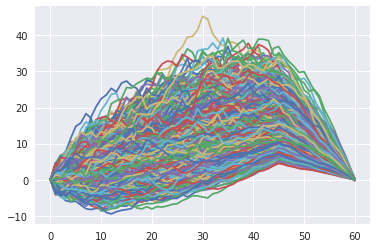

In [12]:
plt.plot(F.T)
plt.show()

In [13]:
mean_F=(np.mean(F,axis=0))
print(mean_F)

[ 0.          0.33860631  0.66572235  1.01410365  1.35112364  1.67303208
  2.02625016  2.35095735  2.67378235  2.99813053  3.33445271  3.65166774
  3.99473866  4.30703676  4.67636714  5.00984591  5.32836538  5.65291306
  5.99920628  6.32379488  6.61688668  6.94876487  7.28169415  7.62879777
  7.96338644  8.29670843  8.61176398  8.93495171  9.27462459  9.61289241
  9.94592144 10.29361786 10.62679459 10.94290206 11.26040632 11.57241039
 11.89452186 12.22573345 12.54530501 12.86194142 13.16029666 13.44594819
 13.72528685 14.0058076  14.29378622 14.55593238 13.81485724 13.04547305
 12.24550541 11.42607305 10.57059483  9.66777207  8.74504866  7.79103359
  6.80131776  5.77842776  4.71729722  3.60657372  2.45995809  1.26904413
  0.01971125]


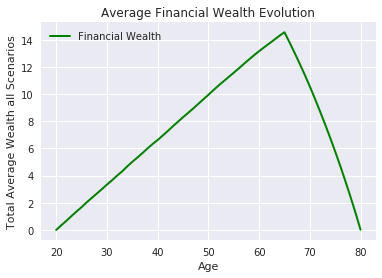

In [14]:
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.title('Average Financial Wealth Evolution')
plt.legend()
plt.show()

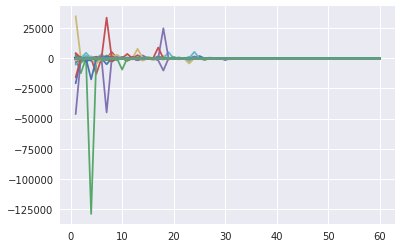

In [15]:
plt.plot(fstar.T)
plt.show()

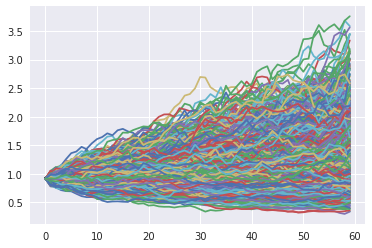

[[0.91610157 0.91610157 0.91610157 ... 0.91610157 0.91610157 0.91610157]
 [0.93735429 1.02732113 0.97209405 ... 0.98468845 0.98367922 0.91935668]
 [0.94032272 1.02978813 0.94202357 ... 0.94514924 0.98191575 0.91884915]
 ...
 [1.30969098 1.31465327 1.45185128 ... 0.89103372 0.84779551 1.18511628]
 [1.19633482 1.39028876 1.30372656 ... 0.874068   0.82770057 1.35443699]
 [      -inf       -inf       -inf ...       -inf        inf        inf]]


In [16]:
plt.plot(C.T)
plt.show()
print(C.T)

In [17]:
mean_C=(np.mean(C,axis=0))
print(mean_C)

[0.91610157 0.92102817 0.9255833  0.93079522 0.93564147 0.93999351
 0.94534724 0.94977133 0.95412243 0.95851399 0.96330231 0.96744056
 0.97246243 0.9764219  0.98238869 0.98711428 0.99131232 0.99573612
 1.00098357 1.00545102 1.00873192 1.01351313 1.01837588 1.02385715
 1.02890077 1.03395787 1.03831201 1.04307199 1.04863833 1.05426068
 1.05977345 1.06612033 1.07195555 1.07712259 1.08252246 1.08782202
 1.09387134 1.1006989  1.10719583 1.11386703 1.11979167 1.12525979
 1.13066424 1.1365487  1.14347688 1.14901783 1.15568764 1.16242064
 1.16908917 1.17690772 1.1844154  1.19024291 1.1977098  1.20582589
 1.21427803 1.22401093 1.23489118 1.24451276 1.25873523 1.28382196
        nan]


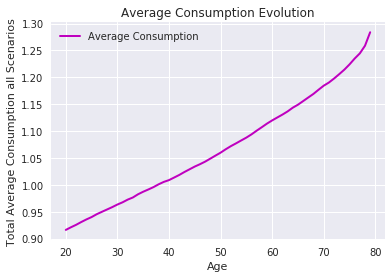

In [18]:
plt.plot(age, mean_C, color = 'm', linewidth = 2, label = 'Average Consumption')
plt.xlabel('Age')
plt.ylabel('Total Average Consumption all Scenarios')
plt.title('Average Consumption Evolution')
plt.legend()
plt.show()

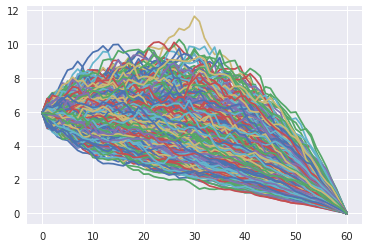

In [19]:
plt.plot(fstar_times_F.T)
plt.show()

In [20]:
mean_fstar_times_F=(np.mean(fstar_times_F,axis=0))
print(mean_fstar_times_F)

[5.93430340e+00 5.91989215e+00 5.90152365e+00 5.88571550e+00
 5.86590818e+00 5.84131677e+00 5.82118992e+00 5.79352720e+00
 5.76361731e+00 5.73210355e+00 5.70103750e+00 5.66416362e+00
 5.63043439e+00 5.58848311e+00 5.55582905e+00 5.51385282e+00
 5.46668941e+00 5.41849197e+00 5.37235873e+00 5.31955350e+00
 5.25807074e+00 5.20191906e+00 5.14350238e+00 5.08539534e+00
 5.02220909e+00 4.95614122e+00 4.88373870e+00 4.81022708e+00
 4.73722169e+00 4.66108811e+00 4.58100208e+00 4.50088616e+00
 4.41484306e+00 4.32230180e+00 4.22689328e+00 4.12717455e+00
 4.02620226e+00 3.92370880e+00 3.81547865e+00 3.70318392e+00
 3.58368515e+00 3.45802617e+00 3.32741203e+00 3.19326713e+00
 3.05677051e+00 2.91118648e+00 2.76297145e+00 2.60909461e+00
 2.44910108e+00 2.28521461e+00 2.11411897e+00 1.93355441e+00
 1.74900973e+00 1.55820672e+00 1.36026355e+00 1.15568555e+00
 9.43459444e-01 7.21314744e-01 4.91991618e-01 2.53808826e-01
 3.94225008e-03]


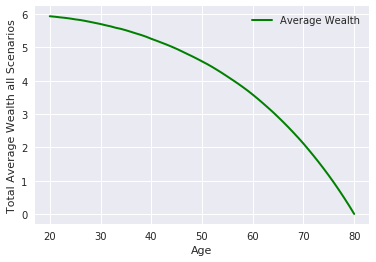

In [21]:
plt.plot(age, mean_fstar_times_F, color = 'g', linewidth = 2, label = 'Average Wealth')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.legend()
plt.show()

### 3. Calculating Welfare

The welfare level is measured by the constant, certain consumption level that achieves the same utility level as the various stochastic consumption streams. Which is referred to as the certainty equivalent (ce).

In [22]:
U = sum(np.exp(-rho*np.linspace(1,D,D))*np.mean((deltat*(1/(1-theta))*C**(1-theta))))
ce_consumption = (U /(sum(np.exp(-rho*np.linspace(1,D,D)))*deltat*(1/(1-theta))) )**(1/(1-theta))

In [23]:
print("Welfare - Benchmark model")
print("=================")
print("Utility             : {:.3f}".format(U))
print("Certainty Equivalent: {:.3f}".format(ce_consumption))


Welfare - Benchmark model
Utility             : -11.154
Certainty Equivalent: 0.938


In [24]:
total_wealth=mean_F+human_capital

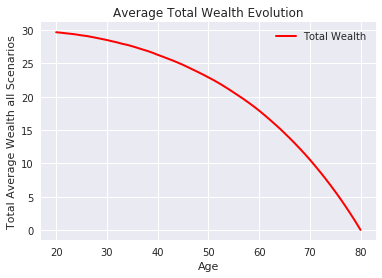

In [25]:
plt.plot(age, total_wealth, color = 'r', linewidth = 2, label = 'Total Wealth')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.title('Average Total Wealth Evolution')
plt.legend()
plt.show()

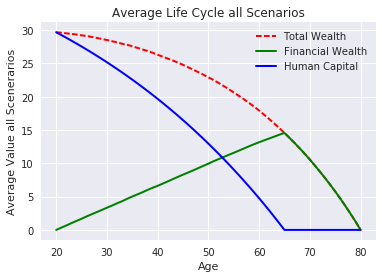

In [26]:
plt.plot(age, total_wealth, color = 'r', linewidth = 2, linestyle= '--', label = 'Total Wealth')
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth')
plt.plot(age, human_capital, color = 'b', linewidth = 2, label = 'Human Capital')
plt.xlabel('Age')
plt.ylabel('Average Value all Scenerarios')
plt.title('Average Life Cycle all Scenarios')
plt.legend()
plt.show()

### 3.1 Optimal allocation over lifcycle
The above graph illustrates the life cycle scenario for the average individual. When individual starts to work, his wealth is mainly human capital. The human capital is depleted as the working years decreases. Contrary to human capital, financial wealth increases with time as a consequence of work. Human capital and financial capital sum up the total wealth of the individual which is fully consumed from the retirement period to the expected time of death because the model assume no bequest. Because risk is incorporated, the lines explaining the life cycle of the individual are not straight.

The individual discount consumption for the older age with a rate of 2%, which is equal to the real interest rate. This implies that the individual finds it optimal to have a constant consumption over the lifecycle as the benefit and cost of delaying consumption are equal. Furthermore, the coefficient of risk aversion is 5 and therefore the intertemporal elasticity of substitution is 1/𝜃= 1/5. Individual has a strong preference to smooth consumption over time. 

## 4. Suboptimal investment decisions that result if decision making is based upon the wrong parameter of relative risk aversion:

#### Subptimal Investment Decisions:
Selecting the correct risk preference parameter is empirically challenging thus in real life is likely that the allocation decisions of the financial wealth will not be adjusted to the people´s real preferences. On one hand, many pensions schemes work based on a homogenous risk preference parameter. This will lead to suboptimal allocations of the financial wealth,
considering that people have different risk preferences. On the other hand, if individuals have the possibility of selecting their risk profile it is likely that they do not have enough financial literacy to reveal their real preferences. Both previous situations lead to a suboptimal investment decision. In this section the consequences of taking the
wrong risk preference parameter from the perspective of individuals life cycle and welfare is analysed.

We introduce an investement fund that will be encharge of the financial allocation for the individual allong all the working life, this investment fund will invest according to an average risk parameter of all its clients, this may not concide with the risk preferences of the individual in particular.

- Risk aversion parameter ($theta$ $invest$) investment fund

The level of risk preference will shape the decisions of consumption and allocation of assets of individuals. When the wrong parameter is taken, the intertemporal substitution elasticity is not adequate and the decisions of risk taking, and intertemporal consumption smoothing are going to be suboptimal (Bovenberg, et al, 2007). Two scenarios are simulated to measure the effects of these suboptimal decisions: (1) overestimating the risk preference parameter and (2) underestimating risk preferences. In both cases, the individual's utility is derived with the real risk aversion parameter. In contrast, the pension contract or investment is made with a different risk preference parameter, thus the share of financial wealth invested in risky assets will directly change and will differ from the optimum. With a different share of financial wealth in risky assets the dynamics of consumption and financial wealth are going to change.

#### 4.1. Scenario 1: Investment fund invests considering more risk averse individuals on average

In [27]:
theta_invest=2

In [28]:
C_invest = np.zeros((scenarios, D+1)) 
F_invest = np.zeros((scenarios, D+1)) 
fstar_invest = np.zeros((scenarios, D+1)) 
fstar_times_F_invest = np.zeros((scenarios, D+1))

In [29]:
for i in range(D+1):
  for j in range (scenarios):
    
    if i==0:
      F_invest[j][i] = 0
    else:
      F_invest[j][i] = F_invest[j][i-1]+F_invest[j][i-1]*r*deltat + fstar_times_F_invest[j][i-1]*sigma*lambd*deltat+ fstar_times_F_invest[j][i-1]*np.sqrt(deltat)*sigma*Z[j][i]+(Y[i-1]-C_invest[j][i-1])*deltat
    
    C_invest[j][i] = (F_invest[j][i] + human_capital[i])*g[i]**(-1)
    fstar_times_F_invest[j][i] = (1/(theta+theta_invest))*(lambd/sigma)*(F_invest[j][i]+human_capital[i])
      
    if i==0:   
      fstar_invest[j][i] = 'NAN'
    else:
      fstar_invest[j][i] = fstar_times_F_invest[j][i]/F[j][i]
print(F_invest)
print(fstar_invest.T)

[[ 0.00000000e+00  6.40603338e-01  8.59416104e-01 ...  2.22236853e+00
   1.05617424e+00  1.57339583e-02]
 [ 0.00000000e+00  2.70581858e+00  2.89348187e+00 ...  2.23812668e+00
   1.18017037e+00  4.84978536e-02]
 [ 0.00000000e+00  1.43806473e+00  9.09781475e-01 ...  2.39203910e+00
   1.12343788e+00  5.17951032e-02]
 ...
 [ 0.00000000e+00  1.72717291e+00  9.87519697e-01 ...  1.68401145e+00
   8.41396095e-01  1.58417500e-02]
 [ 0.00000000e+00  1.70400567e+00  1.80688931e+00 ...  1.62401108e+00
   8.08682235e-01 -1.45566655e-02]
 [ 0.00000000e+00  2.27462956e-01  3.71337124e-01 ...  2.06702190e+00
   1.15367699e+00  1.76585883e-03]]
[[        nan         nan         nan ...         nan         nan
          nan]
 [ 4.94811716  1.21629037  2.21522991 ...  1.8565289   1.88072283
  14.78688261]
 [ 3.73633938  1.13688092  3.57211447 ...  3.30468735  1.77867793
   9.25270823]
 ...
 [ 0.12403832  0.12444633  0.12043557 ...  0.13815275  0.1400253
   0.12749488]
 [ 0.12758889  0.12267886  0.1245353

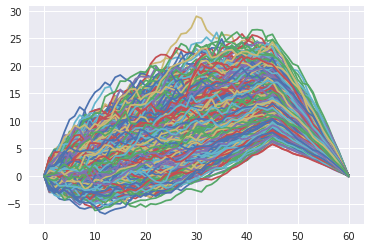

In [30]:
plt.plot(F_invest.T)
plt.show()

In [31]:
mean_F_invest=(np.mean(F_invest,axis=0))
print(mean_F_invest)

[ 0.          0.26583263  0.52440936  0.79947983  1.0671187   1.32531165
  1.60610855  1.86786531  2.12920907  2.39381763  2.66747113  2.92874008
  3.21041967  3.47156207  3.77366329  4.05265248  4.32291493  4.59879017
  4.8909208   5.16985136  5.42840385  5.71523306  6.00403443  6.30580983
  6.60068518  6.89633387  7.18200514  7.47568624  7.78266587  8.0907548
  8.39668217  8.71409729  9.0252456   9.32715538  9.63346524  9.93927334
 10.25464604 10.57683563 10.89536154 11.21436729 11.5244627  11.83024675
 12.13537016 12.44344568 12.7601502  13.06399711 12.36978685 11.65334812
 10.9130948  10.15567968  9.37174032  8.55338604  7.71836523  6.85910576
  5.97287956  5.06094148  4.11991265  3.14244296  2.13715709  1.09786911
  0.0148109 ]


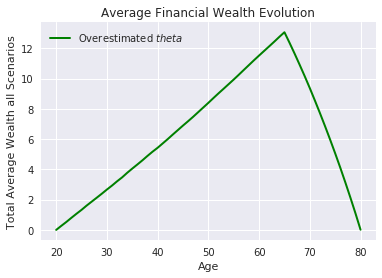

In [32]:
plt.plot(age, mean_F_invest, color = 'g', linewidth = 2, label= 'Overestimated $theta$')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.title('Average Financial Wealth Evolution')
plt.legend()
plt.show()

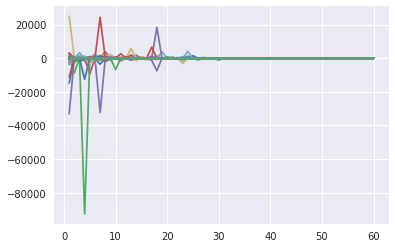

In [33]:
plt.plot(fstar_invest.T)
plt.show()

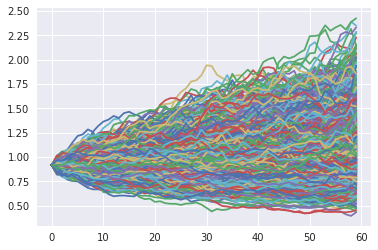

[[0.91610157 0.91610157 0.91610157 ... 0.91610157 0.91610157 0.91610157]
 [0.93042523 0.99468726 0.95523934 ... 0.96423534 0.96351446 0.91756979]
 [0.93165901 0.99546278 0.93323885 ... 0.93567731 0.96137897 0.91634914]
 ...
 [1.1371631  1.14522638 1.22398178 ... 0.86169132 0.83098975 1.05767382]
 [1.06847323 1.19391328 1.13652015 ... 0.85119403 0.81809922 1.16711139]
 [      -inf       -inf       -inf ...       -inf        inf       -inf]]


In [34]:
plt.plot(C_invest.T)
plt.show()
print(C_invest.T)

In [35]:
mean_C_invest=(np.mean(C_invest,axis=0))
print(mean_C_invest)

[0.91610157 0.91876372 0.92115065 0.92400689 0.92658143 0.92880237
 0.93170124 0.93393204 0.93609244 0.93830352 0.94076239 0.94274531
 0.94536964 0.94722701 0.95046524 0.95284208 0.95484728 0.95699367
 0.95968418 0.96182956 0.96313115 0.96544623 0.96778242 0.97058496
 0.9730654  0.97552821 0.97751696 0.97978521 0.98258589 0.98540423
 0.98809295 0.99129244 0.99418204 0.9965934  0.99918937 1.00173104
 1.00476439 1.00818745 1.01143796 1.01475348 1.01756208 1.02010825
 1.02261258 1.02533342 1.02873635 1.03124727 1.03479967 1.03837494
 1.04188276 1.04605474 1.05008599 1.05304583 1.05709666 1.06159051
 1.06637223 1.07202996 1.07850821 1.08435614 1.09356128 1.11065364
        nan]


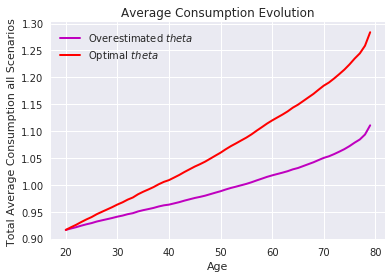

In [36]:
plt.plot(age, mean_C_invest, color = 'm', linewidth = 2, label='Overestimated $theta$')
plt.plot(age, mean_C, color = 'r', linewidth = 2, label='Optimal $theta$')
plt.xlabel('Age')
plt.ylabel('Total Average Consumption all Scenarios')
plt.title('Average Consumption Evolution')
plt.legend()
plt.show()

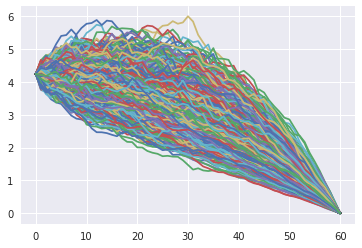

In [37]:
plt.plot(fstar_times_F_invest.T)
plt.show()

In [38]:
mean_fstar_times_F_invest=(np.mean(fstar_times_F_invest,axis=0))
print(mean_fstar_times_F_invest)

[4.23878814e+00 4.21809815e+00 4.19518646e+00 4.17342195e+00
 4.14936228e+00 4.12269478e+00 4.09797257e+00 4.06922057e+00
 4.03907333e+00 4.00802926e+00 3.97688656e+00 3.94255578e+00
 3.90969328e+00 3.87242012e+00 3.83949163e+00 3.80172438e+00
 3.76114237e+00 3.71976243e+00 3.67907260e+00 3.63483199e+00
 3.58598155e+00 3.53943764e+00 3.49140745e+00 3.44342697e+00
 3.39262060e+00 3.34004737e+00 3.28413353e+00 3.22740999e+00
 3.17059282e+00 3.11190042e+00 3.05082445e+00 2.98927289e+00
 2.92466662e+00 2.85653748e+00 2.78678933e+00 2.71467653e+00
 2.64159078e+00 2.56709231e+00 2.48963568e+00 2.40976364e+00
 2.32608454e+00 2.23920420e+00 2.14959193e+00 2.05771053e+00
 1.96431665e+00 1.86628530e+00 1.76711241e+00 1.66476402e+00
 1.55901354e+00 1.45081138e+00 1.33882005e+00 1.22191229e+00
 1.10262360e+00 9.79872252e-01 8.53268509e-01 7.22991640e-01
 5.88558950e-01 4.48920423e-01 3.05308156e-01 1.56838445e-01
 2.11584333e-03]


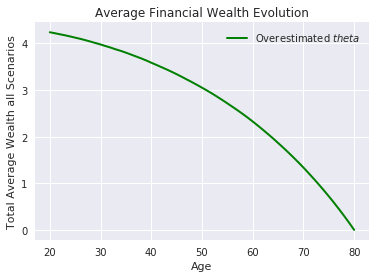

In [39]:
plt.plot(age, mean_fstar_times_F_invest, color = 'g', linewidth = 2, label = 'Overestimated $theta$')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.title('Average Financial Wealth Evolution')
plt.legend()
plt.show()

In [40]:
total_wealth_invest=mean_F_invest+human_capital

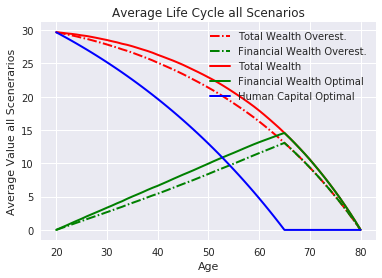

In [42]:
plt.plot(age, total_wealth_invest, color = 'r', linewidth = 2, linestyle= '-.', label = 'Total Wealth Overest.')
plt.plot(age, mean_F_invest, color = 'g', linewidth = 2, linestyle= '-.', label = 'Financial Wealth Overest.')
plt.plot(age, total_wealth, color = 'r', linewidth = 2, linestyle= '-', label = 'Total Wealth')
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth Optimal')
plt.plot(age, human_capital, color = 'b', linewidth = 2, label = 'Human Capital Optimal')
plt.xlabel('Age')
plt.ylabel('Average Value all Scenerarios')
plt.title('Average Life Cycle all Scenarios')
plt.legend()
plt.show()

In [111]:
U_invest = sum(np.exp(-rho*np.linspace(1,D,D))*np.mean((deltat*(1/(1-theta))*C_invest**(1-theta))))
ce_consumption_invest = (U_invest /(sum(np.exp(-rho*np.linspace(1,D,D)))*deltat*(1/(1-theta))) )**(1/(1-theta))
ce_change_invest=(ce_consumption_invest-ce_consumption)/ce_consumption*-100

In [114]:
print ('When the investment decisions are taken with an overestimation of the parameter, the pension fund will allocate less resources in risky assets thinking that the individual is more risk averse. The lower allocation of financial wealth in risky assets will reduce the financial and total wealth on average. Therefore, the average individual will have less resources to consume and the intertemporal consumption smoothing will be stronger compared to the benchmark model. In this case the welfare loss is',round(ce_change_invest,1),'%   which is lower compared to the case when pension fund underestimates the risk preference. The lower welfare loss is explained  because individuals will have a lower level of consumption and the wrong intertemporal consumption smoothing.')

When the investment decisions are taken with an overestimation of the parameter, the pension fund will allocate less resources in risky assets thinking that the individual is more risk averse. The lower allocation of financial wealth in risky assets will reduce the financial and total wealth on average. Therefore, the average individual will have less resources to consume and the intertemporal consumption smoothing will be stronger compared to the benchmark model. In this case the welfare loss is 0.6 %   which is lower compared to the case when pension fund underestimates the risk preference. The lower welfare loss is explained  because individuals will have a lower level of consumption and the wrong intertemporal consumption smoothing.


#### 4.2. Scenario 2: Investment fund invests considering less risk averse individuals on average

[[ 0.          1.38287655  1.78324131 ...  3.43655551  1.48171515
   0.03499776]
 [ 0.          6.20171211  6.55421474 ...  3.3831969   1.86964269
   0.15844412]
 [ 0.          3.2436198   1.81026971 ...  4.08378656  1.70750974
   0.16466551]
 ...
 [ 0.          3.91820554  1.94062    ...  1.8293583   0.89286389
   0.02927848]
 [ 0.          3.86414866  3.99137057 ...  1.69183916  0.81909509
  -0.04352778]
 [ 0.          0.41888233  0.63734997 ...  2.92495283  1.82683083
  -0.01382676]]
[[        nan         nan         nan ...         nan         nan
          nan]
 [11.83221463  3.14837734  5.47287655 ...  4.63819119  4.69448966
  34.72669581]
 [ 8.98929249  2.95871841  8.58720558 ...  7.95731465  4.44605598
  21.7862458 ]
 ...
 [ 0.44754834  0.43893627  0.47976253 ...  0.35017897  0.34037165
   0.42096242]
 [ 0.41765607  0.45348239  0.44165535 ...  0.34446639  0.33370898
   0.45482711]
 [ 0.56326277  0.70919084  0.69589756 ...  0.4907502   0.62130476
   2.87070072]]


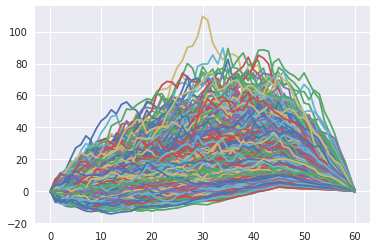

[ 0.          0.50841156  0.99664989  1.51746807  2.0199449   2.49435626
  3.02431592  3.50411946  3.9803052   4.4518976   4.94596742  5.40618113
  5.90406432  6.34803317  6.89173439  7.36697333  7.81191375  8.26578887
  8.75782577  9.20688815  9.59791889 10.05779107 10.51901276 10.99344859
 11.44348447 11.88872927 12.29294573 12.70543971 13.14407463 13.5758309
 14.00020996 14.45182878 14.86158007 15.23345791 15.59719766 15.93963205
 16.29329156 16.67339707 17.01463355 17.34690269 17.6333127  17.87907149
 18.10085752 18.32387049 18.55145141 18.71239688 17.85227543 16.94845159
 15.99502826 15.01908056 13.97572583 12.84562625 11.68464099 10.47025066
  9.19148599  7.85695638  6.45523916  4.96270288  3.40695166  1.7751971
  0.03597767]


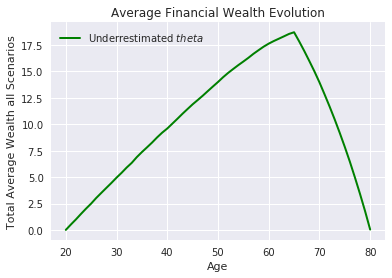

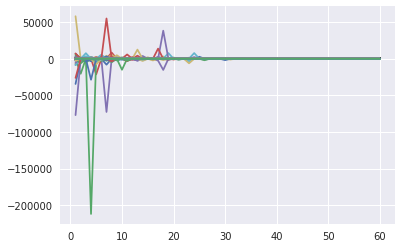

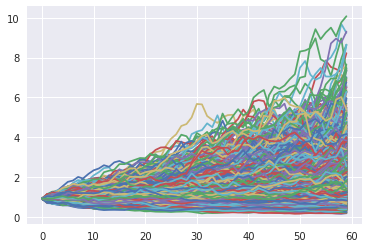

[[0.91610157 0.91610157 0.91610157 ... 0.91610157 0.91610157 0.91610157]
 [0.95352209 1.10346682 1.01142169 ... 1.03241236 1.0307303  0.92352607]
 [0.96063719 1.1102912  0.96148501 ... 0.96557378 1.02990092 0.92469332]
 ...
 [1.75845007 1.73114702 2.08963154 ... 0.9360638  0.86569668 1.49666825]
 [1.49896951 1.8914144  1.72739344 ... 0.90326116 0.82863333 1.84810401]
 [      -inf       -inf       -inf ...       -inf        inf        inf]]
[0.91610157 0.9263119  0.9359637  0.94671611 0.95697753 0.96642726
 0.97776394 0.98758044 0.99737938 1.00713335 1.01776173 1.02737482
 1.0384164  1.04774263 1.06073349 1.07151095 1.0813841  1.09176781
 1.10378135 1.11443796 1.12311085 1.13466223 1.14656897 1.1593401
 1.17149441 1.18383246 1.19484025 1.20659402 1.21994775 1.23353085
 1.24735805 1.26311057 1.27760281 1.29096488 1.30465601 1.31804053
 1.33289004 1.35023518 1.36658252 1.38367002 1.39932772 1.41377209
 1.42803055 1.44392598 1.4620184  1.47712129 1.49343954 1.51019666
 1.52705941 1.5469944

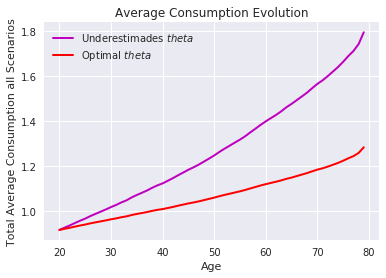

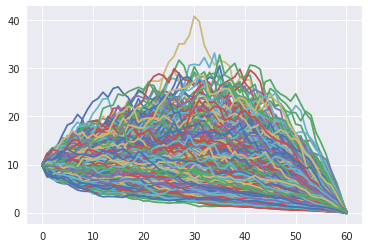

[ 9.89050567  9.92308866  9.94618192  9.97731397  9.99945406 10.00930268
 10.03467179 10.04026604 10.04153647 10.03809493 10.03890074 10.0251105
 10.0204992   9.99447066  9.99817084  9.97546384  9.93899847  9.90177856
  9.87347105  9.82695358  9.75712864  9.70620716  9.65161016  9.59720918
  9.53038116  9.45757566  9.36662509  9.27387447  9.18518616  9.08945968
  8.98643298  8.88754724  8.76966693  8.63402162  8.49041926  8.3343648
  8.17659366  8.02206921  7.84890726  7.66696029  7.46381393  7.24108472
  7.00421028  6.76146618  6.51383925  6.23746563  5.95075848  5.64948386
  5.33167609  5.00636019  4.65857528  4.28187542  3.89488033  3.49008355
  3.06382866  2.61898546  2.15174639  1.65423429  1.13565055  0.59173237
  0.01199256]


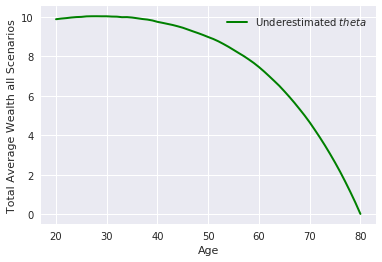

In [43]:
theta_invest_2=-2
C_invest_2= np.zeros((scenarios, D+1)) 
F_invest_2= np.zeros((scenarios, D+1)) 
fstar_invest_2= np.zeros((scenarios, D+1)) 
fstar_times_F_invest_2 = np.zeros((scenarios, D+1))
for i in range(D+1):
  for j in range (scenarios):
    
    if i==0:
      F_invest_2[j][i] = 0
    else:
      F_invest_2[j][i] = F_invest_2[j][i-1]+F_invest_2[j][i-1]*r*deltat + fstar_times_F_invest_2[j][i-1]*sigma*lambd*deltat+ fstar_times_F_invest_2[j][i-1]*np.sqrt(deltat)*sigma*Z[j][i]+(Y[i-1]-C_invest_2[j][i-1])*deltat
    
    C_invest_2[j][i] = (F_invest_2[j][i] + human_capital[i])*g[i]**(-1)
    fstar_times_F_invest_2[j][i] = (1/(theta+theta_invest_2))*(lambd/sigma)*(F_invest_2[j][i]+human_capital[i])
      
    if i==0:   
      fstar_invest_2[j][i] = 'NAN'
    else:
      fstar_invest_2[j][i] = fstar_times_F_invest_2[j][i]/F[j][i]
print(F_invest_2)
print(fstar_invest_2.T)
plt.plot(F_invest_2.T)
plt.show()
mean_F_invest_2=(np.mean(F_invest_2,axis=0))
print(mean_F_invest_2)
plt.plot(age, mean_F_invest_2, color = 'g', linewidth = 2, label= 'Underrestimated $theta$')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.title('Average Financial Wealth Evolution')
plt.legend()
plt.show()
plt.plot(fstar_invest_2.T)
plt.show()
plt.plot(C_invest_2.T)
plt.show()
print(C_invest_2.T)
mean_C_invest_2=(np.mean(C_invest_2,axis=0))
print(mean_C_invest_2)
plt.plot(age, mean_C_invest_2, color = 'm', linewidth = 2, label='Underestimades $theta$')
plt.plot(age, mean_C, color = 'r', linewidth = 2, label='Optimal $theta$')
plt.xlabel('Age')
plt.ylabel('Total Average Consumption all Scenarios')
plt.title('Average Consumption Evolution')
plt.legend()
plt.show()
plt.plot(fstar_times_F_invest_2.T)
plt.show()
mean_fstar_times_F_invest_2=(np.mean(fstar_times_F_invest_2,axis=0))
print(mean_fstar_times_F_invest_2)
plt.plot(age, mean_fstar_times_F_invest_2, color = 'g', linewidth = 2, label = 'Underestimated $theta$')
plt.xlabel('Age')
plt.ylabel('Total Average Wealth all Scenarios')
plt.legend()
plt.show()

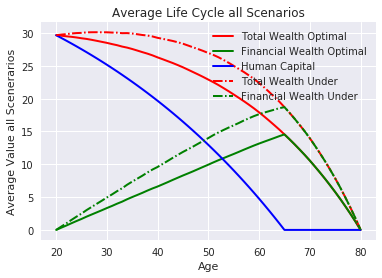

In [44]:
total_wealth_invest_2=mean_F_invest_2+human_capital
plt.plot(age, total_wealth, color = 'r', linewidth = 2, linestyle= '-', label = 'Total Wealth Optimal')
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth Optimal')
plt.plot(age, human_capital, color = 'b', linewidth = 2, label = 'Human Capital')
plt.plot(age, total_wealth_invest_2, color = 'r', linewidth = 2, linestyle= '-.', label = 'Total Wealth Under')
plt.plot(age, mean_F_invest_2, color = 'g', linewidth = 2, linestyle= '-.', label = 'Financial Wealth Under')
plt.xlabel('Age')
plt.ylabel('Average Value all Scenerarios')
plt.title('Average Life Cycle all Scenarios')
plt.legend()
plt.show()

In [115]:
U_invest = sum(np.exp(-rho*np.linspace(1,D,D))*np.mean((deltat*(1/(1-theta))*C_invest**(1-theta))))
ce_consumption_invest2 = (U_invest_2 /(sum(np.exp(-rho*np.linspace(1,D,D)))*deltat*(1/(1-theta))) )**(1/(1-theta))
ce_change_invest2=(ce_consumption_invest2-ce_consumption)/ce_consumption*-100

In [116]:
print('In the case of underestimation, the pension fund allocates more resources in risky assets. This will lead to an increase in the financial and total wealth on average as it is shown in the above graph , this is translated into a higher level of consumption. However, the welfare of the individual is lower because with these investment decisions the smoothing level of consumption is lower compared to the real preferences of the average individual, represented by the benchmark model. This last effect outweighs the positive effect of a higher consumption. Also, the individual is exposed to less risk compared to what she is really willing to assume. The certainty equivalent gives an accurate measure of the welfare loss, which is',round(ce_change_invest2,1),'%.')


In the case of underestimation, the pension fund allocates more resources in risky assets. This will lead to an increase in the financial and total wealth on average as it is shown in the above graph , this is translated into a higher level of consumption. However, the welfare of the individual is lower because with these investment decisions the smoothing level of consumption is lower compared to the real preferences of the average individual, represented by the benchmark model. This last effect outweighs the positive effect of a higher consumption. Also, the individual is exposed to less risk compared to what she is really willing to assume. The certainty equivalent gives an accurate measure of the welfare loss, which is 8.4 %.


#### 4.3. All Investment Decision Scenarios Introducing an Investment Fund

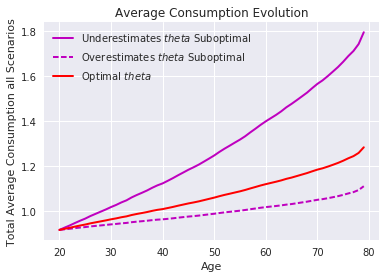

In [45]:
plt.plot(age, mean_C_invest_2, color = 'm', linewidth = 2, label='Underestimates $theta$ Suboptimal')
plt.plot(age, mean_C_invest, color = 'm', linestyle= '--', linewidth = 2, label='Overestimates $theta$ Suboptimal')
plt.plot(age, mean_C, color = 'r', linewidth = 2, label='Optimal $theta$')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Total Average Consumption all Scenarios')
plt.title('Average Consumption Evolution')
plt.show()

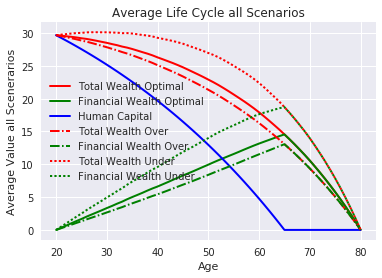

In [46]:
plt.plot(age, total_wealth, color = 'r', linewidth = 2, linestyle= '-', label = 'Total Wealth Optimal')
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth Optimal')
plt.plot(age, human_capital, color = 'b', linewidth = 2, label = 'Human Capital')
plt.plot(age, total_wealth_invest, color = 'r', linewidth = 2, linestyle= '-.', label = 'Total Wealth Over')
plt.plot(age, mean_F_invest, color = 'g', linewidth = 2, linestyle= '-.', label = 'Financial Wealth Over')
plt.plot(age, total_wealth_invest_2, color = 'r', linewidth = 2, linestyle= ':', label = 'Total Wealth Under')
plt.plot(age, mean_F_invest_2, color = 'g', linewidth = 2, linestyle= ':', label = 'Financial Wealth Under')
plt.xlabel('Age')
plt.ylabel('Average Value all Scenerarios')
plt.title('Average Life Cycle all Scenarios')
plt.legend()
plt.show()

Above graph shows the life cycle of the individual in the previous two scenarios as well as the optimum.

#### 4.4. Calculating Welfare for Each Scenario

In [117]:
data = [['Benchmark', U, ce_consumption], ['Overestimation risk preference', U_invest, ce_consumption_invest] , ['Underestimation risk preference', U_invest_2, ce_consumption_invest_2]]
pd.DataFrame(data, columns=['Model','Utility' ,'Certainty equivalent'])

,Model,Utility,Certainty equivalent
0,Benchmark,-11.154271,0.938358
1,Overestimation risk preference,-11.428920,0.932670
2,Underestimation risk preference,-15.816335,0.859909


## 5. Suboptimal consumption decisions that result from oversaving during the working period (e.g. because home owners also save through repaying their mortgage)

In this section we analyze the impact of oversaving during the working time period. This possibility must be considered to analyse the effect of providing more choices in retirement pension schemes. Why is this important? As we will see, oversaving during working life leads to a redistribution of consumption along an individual’s life mainly by postponing consumption when young to old and also a higher wealth accumulation along the life cycle. One common example how an individual can oversave during his working life is by buying a house meanwhile she continues saving on her own will, without realizing her decision is suboptimal, or because she is forced to save because the existence of a defined contribution scheme. In this case, we simulate the first scenario including the parameter "oversaving", which shows that individual reduces the consumption in 30% for paying the mortgage.




#### 5.1. Oversavings because of a house mortgage

In [48]:
Oversaving=0.3

In [49]:
C_Over = np.zeros((scenarios, D+1)) 
F_Over = np.zeros((scenarios, D+1)) 
fstar_Over = np.zeros((scenarios, D+1)) 
fstar_times_F_Over = np.zeros((scenarios, D+1))

In [50]:
for i in range(D+1):
  for j in range (scenarios):
    
    if i==0:
      F_Over[j][i] = 0
    else:
      F_Over[j][i] = F_Over[j][i-1]+F_Over[j][i-1]*r*deltat + fstar_times_F_Over[j][i-1]*sigma*lambd*deltat+ fstar_times_F_Over[j][i-1]*np.sqrt(deltat)*sigma*Z[j][i]+(Y[i-1]-C_Over[j][i-1])*deltat
    
    C_Over[j][i] = (F_Over[j][i]*(1-Oversaving) + human_capital[i])*g[i]**(-1)
    fstar_times_F_Over[j][i] = (1/theta)*(lambd/sigma)*(F_Over[j][i]+human_capital[i])
      
    if i==0:   
      fstar_Over[j][i] = 'NAN'
    else:
      fstar_Over[j][i] = fstar_times_F_Over[j][i]/F[j][i]
print(F_Over)
print(fstar_Over.T)

[[0.         0.8632853  1.1436741  ... 6.56223717 4.03924568 1.29662763]
 [0.         3.75458664 4.02282383 ... 6.73023006 4.63313513 1.65719329]
 [0.         1.97973125 1.20831921 ... 7.46974568 4.53938368 1.6555003 ]
 ...
 [0.         2.3844827  1.31174404 ... 4.58468696 2.97856098 0.97253145]
 [0.         2.35204857 2.48355859 ... 4.26914929 2.76349672 0.75982544]
 [0.         0.28488877 0.45369698 ... 5.7895966  4.23550447 1.2803688 ]]
[[          nan           nan           nan ...           nan
            nan           nan]
 [   6.97895345    1.75867248    3.15604309 ...    2.65427274
     2.68811651   20.7419502 ]
 [   5.2809375     1.64827349    5.05114147 ...    4.67684971
     2.54512705   12.9903117 ]
 ...
 [   0.51276664    0.5239084     0.52652665 ...    0.52656528
     0.51533175    0.49994705]
 [   0.68313352    0.67426098    0.70447965 ...    0.68947631
     0.67552865    0.63270958]
 [  12.5209528     4.45052654    4.19781388 ...    9.78063093
    -6.50733557 -159.497

In [51]:
mean_F_Over=(np.mean(F_Over,axis=0))
print(mean_F_Over)
mean_C_Over=(np.mean(C_Over,axis=0))
print(mean_C_Over)
mean_fstar_times_F_Over=(np.mean(fstar_times_F_Over,axis=0))
print(mean_fstar_times_F_Over)
total_wealth_Over=mean_F_Over+human_capital

[ 0.          0.33860631  0.66888321  1.0235333   1.37022605  1.70515679
  2.07475184  2.41946977  2.76584166  3.11705433  3.48405773  3.83581328
  4.21700998  4.5714562   4.98715867  5.37112749  5.74417919  6.12745984
  6.53741893  6.93017     7.2950936   7.70422468  8.11951283  8.55336225
  8.98005753  9.41093937  9.82780696 10.25822218 10.71173773 11.16966451
 11.62880776 12.10972655 12.58113273 13.04078078 13.50761387 13.97473399
 14.45909867 14.962328   15.45896717 15.96106411 16.44907402 16.92837219
 17.40778525 17.89709513 18.40262774 18.88420871 18.36867932 17.8066105
 17.19091975 16.53333772 15.80607123 14.98763447 14.11090886 13.15160097
 12.09099458 10.91989972  9.60829362  8.10082062  6.3634941   4.25942061
  1.35878636]
[0.91610157 0.91786731 0.91938807 0.92138148 0.92313739 0.92456364
 0.92670647 0.92821929 0.92969854 0.93121748 0.93303605 0.93442151
 0.93643982 0.9377382  0.94046946 0.94235614 0.94389491 0.94561603
 0.94795611 0.94978081 0.95078256 0.95288815 0.95509602 

<a name="Average Life Cycle all Scenarios"></a>

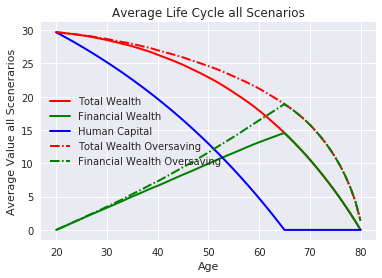

In [52]:
plt.plot(age, total_wealth, color = 'r', linewidth = 2, linestyle= '-', label = 'Total Wealth')
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth')
plt.plot(age, human_capital, color = 'b', linewidth = 2, label = 'Human Capital')
plt.plot(age, total_wealth_Over, color = 'r', linewidth = 2, linestyle= '-.', label = 'Total Wealth Oversaving')
plt.plot(age, mean_F_Over, color = 'g', linewidth = 2, linestyle= '-.', label = 'Financial Wealth Oversaving')
plt.xlabel('Age')
plt.ylabel('Average Value all Scenerarios')
plt.title('Average Life Cycle all Scenarios')
plt.legend()
plt.savefig("Graph1.png")
plt.show()

<a name="Average Consumption Evolution"></a>



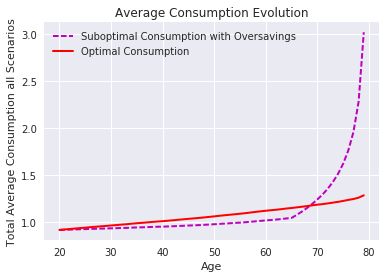

In [53]:
plt.plot(age, mean_C_Over, color = 'm', linestyle= '--', linewidth = 2, label='Suboptimal Consumption with Oversavings')
plt.plot(age, mean_C, color = 'r', linewidth = 2, label='Optimal Consumption')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Total Average Consumption all Scenarios')
plt.title('Average Consumption Evolution')
plt.savefig("Graph2.png")
plt.show()

#### 5.2. Calculating Welfare with Oversavings

In [54]:
U_Over = sum(np.exp(-rho*np.linspace(1,D,D))*np.mean((deltat*(1/(1-theta))*C_Over**(1-theta))))
ce_consumption_Over = (U_Over /(sum(np.exp(-rho*np.linspace(1,D,D)))*deltat*(1/(1-theta))) )**(1/(1-theta))
ce_change_over=(ce_consumption_Over-ce_consumption)/ce_consumption*-100
data = [['Benchmark', U, ce_consumption], ['Oversaving', U_Over, ce_consumption_Over]]
pd.DataFrame(data, columns=['Model','Utility' ,'Certainty equivalent'])


,Model,Utility,Certainty equivalent
0,Benchmark,-11.154271,0.938358
1,Oversaving,-13.181159,0.899996


In [130]:
print('The results suggest: firstly, we see a reduction in consumption when young compared to the optimum scenario where the person saves the necessary amount in order to guarantee a smooth consumption along her life (graph "Average Consumption Evolution"). It is clear that during the whole working age (from 20 to 65) there is a suboptimal consumption due to the oversaving product of  having bought the house, as soon as this person retires there is an increase in consumption due to the accumulation of wealth  that can be depleted during retirement (the house can be sold and the amount saved plus the valued of the house at that moment could be used during the dissaving period of the person). Hence during the retirement period there is a higher consumption     compared to the optimal situation.')

print('Secondly, this process is explained because oversaving leads to a much higher wealth accumulation by the age of 65, as shown in the graph "Average Life Cycle all Scenarios", and a much-pronounced deaccumulation process when retired. Even though there is   an enormous increase in consumption when old and an increase of wealth during the working life, the previous situation leads to a suboptimal output because too much consumption when young is sacrificed. This situation goes against the preferences of the  individual that would want to smooth consumption over the lifetime path. This can be seen with a utility reduction of nearly   ', round(ce_change_over,1),'% compared to the optimum scenario (analyzing the certainty equivalent as a comparable of welfare losses or gains).')

The results suggest: firstly, we see a reduction in consumption when young compared to the optimum scenario where the person saves the necessary amount in order to guarantee a smooth consumption along her life (graph "Average Consumption Evolution"). It is clear that during the whole working age (from 20 to 65) there is a suboptimal consumption due to the oversaving product of  having bought the house, as soon as this person retires there is an increase in consumption due to the accumulation of wealth  that can be depleted during retirement (the house can be sold and the amount saved plus the valued of the house at that moment could be used during the dissaving period of the person). Hence during the retirement period there is a higher consumption     compared to the optimal situation.
Secondly, this process is explained because oversaving leads to a much higher wealth accumulation by the age of 65, as shown in the graph "Average Life Cycle all Scenarios", and a much-pronounced deaccum

## 6. Suboptimal consumption decisions that result from undersaving during the working period

One of the main reasons why there is mandatory saving in pension system is because people do not save enough for their retirement. People are myopic, short sighted  which leads to behavior mistakes in the process of optimizing consumption allocation over lifecycle. We will look at the situation at which the individual undersaves during the working period because the individual underestimates the risky asset excess return.

[Equation 2](#equation2) shows that individuals choose the share of risk-bearing assets based on the Sharpe ratio, which relates the expected excess return with the standard deviation of the excess return. We assume that individuals are pessimistic with financial markets thus instead of expecting an excess return of 4% the individual expects a  3%. This difference will make the individual accumulate less wealth for the retirement period compared to the optimal scenario. This decision will hinder the consumption during the whole life cycle, not just in the retirement period.

The Sharpe ratio included in the financial wealth dynamics ([equation 3](#equation3) ) remains with the baseline scenario values.



In [55]:
C_Under = np.zeros((scenarios, D+1)) 
F_Under = np.zeros((scenarios, D+1)) 
fstar_Under = np.zeros((scenarios, D+1)) 
fstar_times_F_Under = np.zeros((scenarios, D+1))

lambd2=0.01/sigma

for i in range(D+1):
  for j in range (scenarios):
    
    if i==0:
      F_Under[j][i] = 0
    else:
      F_Under[j][i] = F_Under[j][i-1]+F_Under[j][i-1]*(r)*deltat + fstar_times_F_Under[j][i-1]*sigma*lambd*deltat+ fstar_times_F_Under[j][i-1]*np.sqrt(deltat)*sigma*Z[j][i]+(Y[i-1]-C_Under[j][i-1])*deltat
    
    C_Under[j][i] = (F_Under[j][i] + human_capital[i])*g[i]**(-1)
    fstar_times_F_Under[j][i] = (1/(theta))*((lambd-lambd2)/sigma)*(F_Under[j][i]+human_capital[i])
      
    if i==0:   
      fstar_Under[j][i] = 'NAN'
    else:
      fstar_Under[j][i] = fstar_times_F_Under[j][i]/F[j][i]
print(F_Under)
print(fstar_Under.T)

[[ 0.00000000e+00  6.68438584e-01  8.93896568e-01 ...  2.26308614e+00
   1.07178392e+00  1.63170769e-02]
 [ 0.00000000e+00  2.83691459e+00  3.03008446e+00 ...  2.27860307e+00
   1.20367749e+00  5.14342015e-02]
 [ 0.00000000e+00  1.50577304e+00  9.45253175e-01 ...  2.44484291e+00
   1.14351249e+00  5.48789460e-02]
 ...
 [ 0.00000000e+00  1.80933663e+00  1.02601703e+00 ...  1.69176153e+00
   8.44534755e-01  1.63430761e-02]
 [ 0.00000000e+00  1.78501103e+00  1.88869886e+00 ...  1.62868111e+00
   8.10164309e-01 -1.56509628e-02]
 [ 0.00000000e+00  2.34641183e-01  3.81294832e-01 ...  2.09758218e+00
   1.17595930e+00  1.39869752e-03]]
[[        nan         nan         nan ...         nan         nan
          nan]
 [ 5.20035953  1.28234232  2.33112152 ...  1.954524    1.97992502
  15.53000623]
 [ 3.92771077  1.19886327  3.75519202 ...  3.47439994  1.87259696
   9.71865524]
 ...
 [ 0.13262646  0.13303178  0.12924887 ...  0.14572798  0.14744936
   0.13584885]
 [ 0.13594832  0.13137855  0.133098

In [56]:
mean_F_Under=(np.mean(F_Under,axis=0))
print(mean_F_Under)
mean_C_Under=(np.mean(C_Under,axis=0))
print(mean_C_Under)
mean_fstar_times_F_Under=(np.mean(fstar_times_F_Under,axis=0))
print(mean_fstar_times_F_Under)
total_wealth_Under=mean_F_Under+human_capital

[ 0.          0.27492934  0.54205665  0.82627163  1.10253304  1.36863713
  1.65837975  1.92789217  2.19678366  2.46875115  2.75008113  3.01817279
  3.30736948  3.57474017  3.88501132  4.17061547  4.44672425  4.72847482
  5.02711815  5.31151878  5.57416151  5.86632838  6.16031978  6.46747898
  6.76703077  7.06708325  7.35616755  7.65327938  7.96405733  8.27562617
  8.58460354  8.90540262  9.2189939   9.52239553  9.82986311 10.13625109
 10.45226653 10.77525756 11.09368829 11.41215898 11.72061596 12.0238105
 12.32568776 12.63025044 12.94330501 13.24200662 12.54206506 11.81916308
 11.07164003 10.30664503  9.51404474  8.68553049  7.83998101  6.96937808
  6.07080972  5.14566378  4.1903719   3.1971265   2.17514769  1.11797432
  0.0153679 ]
[0.91610157 0.91904678 0.9217042  0.92485429 0.92771119 0.93019677
 0.93339899 0.93590016 0.93832974 0.94080958 0.9435541  0.94580034
 0.94871859 0.95083247 0.95440298 0.95706573 0.95933752 0.96176
 0.96475947 0.96718488 0.96872371 0.97133395 0.9739711  0.9

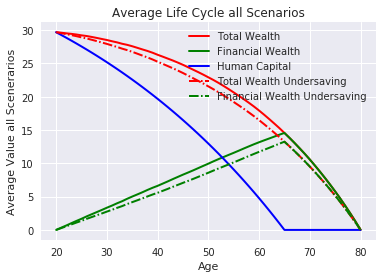

In [57]:
plt.plot(age, total_wealth, color = 'r', linewidth = 2, linestyle= '-', label = 'Total Wealth')
plt.plot(age, mean_F, color = 'g', linewidth = 2, label = 'Financial Wealth')
plt.plot(age, human_capital, color = 'b', linewidth = 2, label = 'Human Capital')
plt.plot(age, total_wealth_Under, color = 'r', linewidth = 2, linestyle= '-.', label = 'Total Wealth Undersaving')
plt.plot(age, mean_F_Under, color = 'g', linewidth = 2, linestyle= '-.', label = 'Financial Wealth Undersaving')
plt.xlabel('Age')
plt.ylabel('Average Value all Scenerarios')
plt.title('Average Life Cycle all Scenarios')
plt.legend()
plt.show()

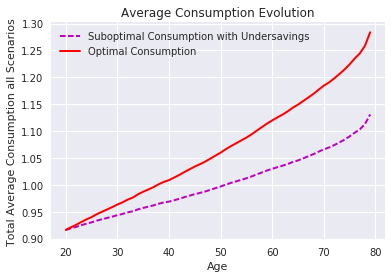

In [58]:
plt.plot(age, mean_C_Under, color = 'm', linestyle= '--', linewidth = 2, label='Suboptimal Consumption with Undersavings')
plt.plot(age, mean_C, color = 'r', linewidth = 2, label='Optimal Consumption')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Total Average Consumption all Scenarios')
plt.title('Average Consumption Evolution')
plt.show()

In [59]:
U_Under = sum(np.exp(-rho*np.linspace(1,D,D))*np.mean((deltat*(1/(1-theta))*C_Under**(1-theta))))
ce_consumption_Under = (U_Under /(sum(np.exp(-rho*np.linspace(1,D,D)))*deltat*(1/(1-theta))) )**(1/(1-theta))
data = [['Benchmark', U, ce_consumption], ['Undersaving', U_Under, ce_consumption_Under]]
pd.DataFrame(data, columns=['Model','Utility' ,'Certainty equivalent'])

,Model,Utility,Certainty equivalent
0,Benchmark,-11.154271,0.938358
1,Undersaving,-11.338601,0.934521


In [131]:
ce_change_under=(ce_consumption_Under-ce_consumption)/ce_consumption*-100

In [138]:
print('From the above graph it is to see that not having sufficient information about the financial market may lead to welfare loss.  Due the pessimistic idea of the market, the individual share in risky asset was lower than what he would have actually prefer. In a sence he is taking less risk than he would want to given his risk preferences. The graph named "Average Life Cycle all    Scenarios" shows that the total financial wealth on average grows less than the benchmark, and therefore the total accumulated wealth is less. Leading to a lower consumption over the lifecycle of the individual. Moreover, this can be seen with an utility reduction of', round(ce_change_under,1),'% compared to the optimum scenario (analyzing the certainty equivalent as a comparable of welfare losses or    gains).')

From the above graph it is to see that not having sufficient information about the financial market may lead to welfare loss.  Due the pessimistic idea of the market, the individual share in risky asset was lower than what he would have actually prefer. In a sence he is taking less risk than he would want to given his risk preferences. The graph named "Average Life Cycle all    Scenarios" shows that the total financial wealth on average grows less than the benchmark, and therefore the total accumulated wealth is less. Leading to a lower consumption over the lifecycle of the individual. Moreover, this can be seen with an utility reduction of 0.4 % compared to the optimum scenario (analyzing the certainty equivalent as a comparable of welfare losses or    gains).


## Policy implications and research question answer
The previous cases show that any deviation from the individual's specific preference parameters will lead to suboptimal investment or consumption scenario (considering that they already know how much to save in order to guarantee smooth consumption between young and old periods, in other words they are in an optimum path). Nonetheless, this situation is not far from what is observed in reality with government or big pension funds making decisions on average individuals. Thus, it is important to account for individual heterogeneity if we want to maximize welfare while still perusing the main objectives of a pension plan. Although, this does not imply that now we need to fit exactly each individual's preferences, as this would not only be impossible but also costly and inefficient. An intermediate approach can be settled, in which it is possible to provide few choices addressing the most common sources of heterogeneity. This will lead to a welfare improvement situation without sacrificing efficiency with respect to intergenerational risk sharing as an example, profitability or diversification.


If we take for example the case of The Netherlands, we see that individuals are provided with very little choice regarding any pension decision: it is not possible to choose the pension fund, lump-sum preferences and asset allocation and there is little or no opportunity to make a distinction between individuals with different wealth levels, with or without a house, life partner, etcetera. Pension investments are mainly done considering the average individual in society, and this may lead to suboptimal results. 

For example, if we consider the case of a pension fund investing on an average risk aversion coefficient, this implies that people with higher or lower risk aversion preferences will be deviated from their optimal, thus we can derive a welfare gain when accounting for a closer individual fit. The same situation occurs in our second approach, wealth levels and investment decision, additional to retirement savings, may lead to a suboptimal increase of wealth (accumulation and deaccumulation phases) at the cost of a lower consumption during working years. As for the third approach the effects were reversed.

We should not forget, that the previous situation demands that pension funds and the government must focus more efforts in trying to disclose the real preferences of individuals, task that is not easy, but is a necessary step for accounting a wider range of pension options identifying the most popular and a better suitable fit. This can be linked with the possibility of general defaults and some basic arrangements that can be selected by the individual by use of opt-in options, also enhancing for a more well-informed decision and an active participation and comprehension with respect to pensions.

### Conclusion
We have analyzed the consequences of selecting the wrong risk preference parameter, the effects of oversaving and undersaving during the working time period. All three scenarios were compared with the benchmark optimum individual preferences. The results suggest that any deviations have negative consequences on the individual’s welfare. Additionally, policy implications were discussed in each case.

We can conclude that having the wrong parameter preferences can substantially decrease the individual utility.  It is not an easy task for pension funds to meet all participants needs, as there is heterogeneity in the society. Which makes it difficult to optimize the idiosyncratic welfare of all individuals. Nevertheless, there is room for improvement by making use of homogenous defaults options that captures a large part of the society preferences and the opt-in options that accounts for the heterogeneous part can help to raise welfare on a more individual level. 

Even when there is no restriction from a pension scheme or the government, individuals have bounded rationality and do not always do what is considered the optimum. It may be due not really knowing one’s own preferences, but also when these are known, there are other confounded factors that make any kind of analysis hard to interpret. In this way further empirical work has to be done to salience the preferences. ([Back to research question](#Back to research question))